In [1]:
import numpy as np
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


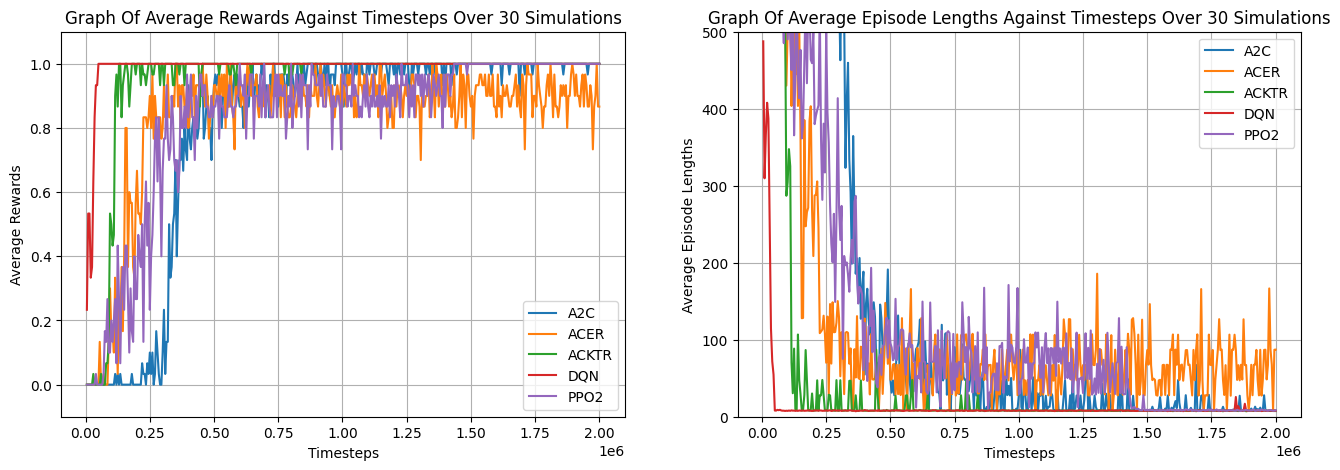

In [2]:
evaluations = [
    {
        "model": "A2C",
        "filename": "models/6x5_4bins_1item_1slot/a2c/evaluations.npz"
    },
    {
        "model": "ACER",
        "filename": "models/6x5_4bins_1item_1slot/acer/evaluations.npz"
    },
    {
        "model": "ACKTR",
        "filename": "models/6x5_4bins_1item_1slot/acktr/evaluations.npz"
    },
    {
        "model": "DQN",
        "filename": "models/6x5_4bins_1item_1slot/dqn/evaluations.npz"
    },
    {
        "model": "PPO2",
        "filename": "models/6x5_4bins_1item_1slot/ppo2/evaluations.npz"
    },
]

_, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].set_title("Graph Of Average Rewards Against Timesteps Over 30 Simulations")
ax[0].set_ylabel("Average Rewards")
ax[0].set_xlabel("Timesteps")
ax[0].legend()
ax[0].grid()
ax[0].set_ylim(ymin=-0.1, ymax=1.1)

ax[1].set_title("Graph Of Average Episode Lengths Against Timesteps Over 30 Simulations")
ax[1].set_ylabel("Average Episode Lengths")
ax[1].set_xlabel("Timesteps")
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(ymin=0, ymax=500)


for evaluation in evaluations:
    model = evaluation["model"]
    filename = evaluation["filename"]
    data = np.load(filename)
    timesteps = data["timesteps"]
    results = data["results"]
    results = np.mean(results, axis=1).reshape(-1)
    ep_lengths = data["ep_lengths"]
    ep_lengths = np.mean(ep_lengths, axis=1).reshape(-1)

    ax[0].plot(timesteps, results, label=model)
    ax[1].plot(timesteps, ep_lengths, label=model)

ax[0].legend()
ax[1].legend()
plt.show()